##### Cellule 1 : Configuration et Importation Cette astuce permet d'importer ton code qui se trouve dans le dossier parent scr

In [14]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajout du dossier 'src' au chemin pour pouvoir importer notre classe
sys.path.append(os.path.abspath(os.path.join('..')))

from src.black_scholes import BlackScholesPricer

# Style des graphiques pour faire "Pro"
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 8)

###### Cellule 2 : Génération des Données Nous allons simuler l'évolution du prix de l'option pour une large gamme de prix du sous-jacent (Spot).

In [15]:
# Paramètres fixes
K = 100       # Strike
T = 1.0       # Maturité (1 an)
r = 0.05      # Taux 5%
sigma = 0.2   # Volatilité 20%

# On fait varier le Spot de 50 à 150 (Deep OTM à Deep ITM)
spots = np.linspace(50, 150, 100)

calls_prices = []
puts_prices = []
deltas_call = []
gammas = []
vegas = []

for s in spots:
    # On crée une nouvelle instance pour chaque prix Spot
    c = BlackScholesPricer(s, K, T, r, sigma, 'call')
    p = BlackScholesPricer(s, K, T, r, sigma, 'put')
    
    calls_prices.append(c.price())
    puts_prices.append(p.price())
    deltas_call.append(c.delta())
    gammas.append(c.gamma())
    vegas.append(c.vega())

##### Cellule 3 : Visualisation du Prix (Le "Hockey Stick") Vérifie que la courbe s'incurve doucement (valeur temps) au lieu d'être brisée comme le Payoff à maturité.

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\batio\AppData\Local\Temp\ipykernel_40284\379144354.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Prix des Options Black-Scholes (K={K}, T={T}an, $\sigma$={sigma})")


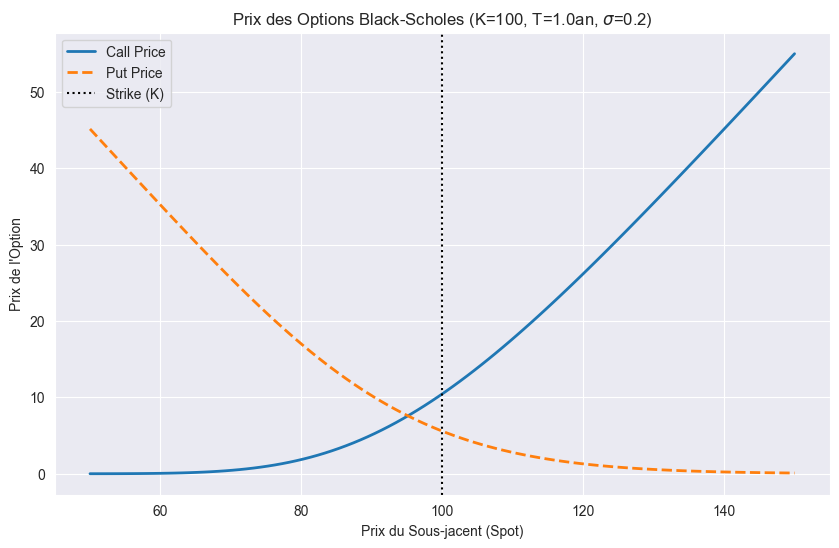

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(spots, calls_prices, label='Call Price', linewidth=2)
plt.plot(spots, puts_prices, label='Put Price', linewidth=2, linestyle='--')
plt.axvline(x=K, color='black', linestyle=':', label='Strike (K)')

plt.title(f"Prix des Options Black-Scholes (K={K}, T={T}an, $\sigma$={sigma})")
plt.xlabel("Prix du Sous-jacent (Spot)")
plt.ylabel("Prix de l'Option")
plt.legend()
plt.show()

##### Cellule 4 : Analyse des Grecs (Delta et Gamma) C'est le graphique le plus important pour un trader.

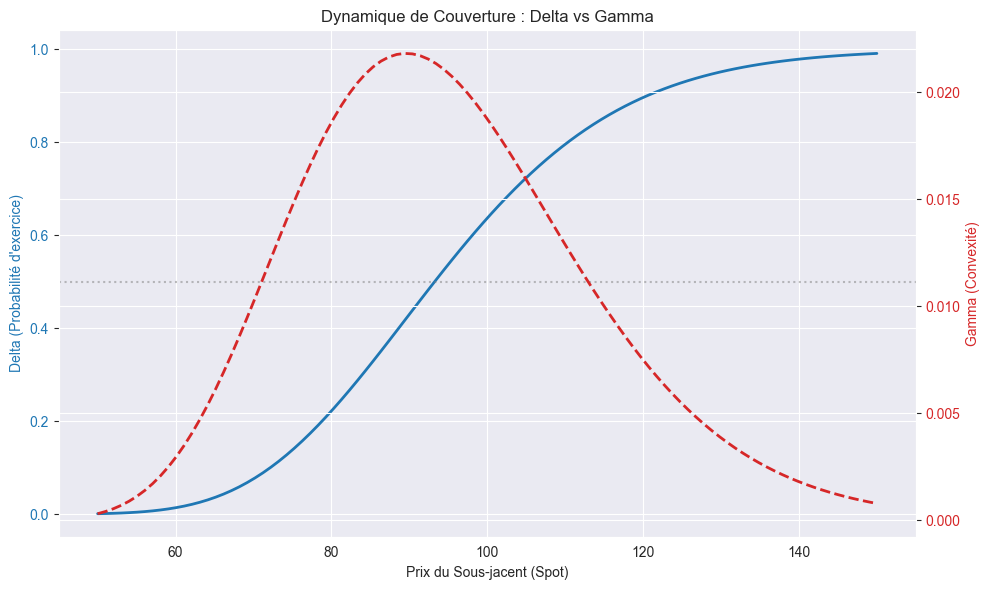

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Axe gauche : Delta
color = 'tab:blue'
ax1.set_xlabel('Prix du Sous-jacent (Spot)')
ax1.set_ylabel('Delta (Probabilité d\'exercice)', color=color)
ax1.plot(spots, deltas_call, color=color, label='Delta Call', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axhline(y=0.5, color='grey', linestyle=':', alpha=0.5)


# Axe droit : Gamma
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Gamma (Convexité)', color=color)  
ax2.plot(spots, gammas, color=color, label='Gamma', linewidth=2, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Dynamique de Couverture : Delta vs Gamma")
fig.tight_layout()  
plt.savefig("graph.png")  # <--- Sauvegarde l'image
plt.show()